<a href="https://colab.research.google.com/github/mehrnazeraeisi/Wine/blob/main/Comparison_Chart_Wine_KnnRegression_Modification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.datasets import load_wine
from sklearn.metrics import r2_score, accuracy_score,  mean_squared_error
from sklearn.model_selection import train_test_split


In [20]:
# Function to prioritize features based on KNN R² score
def features_prioritization(X, y, features):
    features_scores = []
    knn_reg = KNeighborsRegressor()

    for feature in features:
        X_feature = X[[feature]]  # Ensure 2D
        knn_reg.fit(X_feature, y)
        y_pred = knn_reg.predict(X_feature)
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        features_scores.append((feature, r2, mse))  # اضافه شد

    df_scores = pd.DataFrame(features_scores, columns=['Feature', 'R2_Score', 'MSE']).sort_values(by='R2_Score', ascending=False)
    return df_scores



In [38]:
# Function to prioritize features based on KNN MSE

def knn_mse(X_data, y_data, selected_features):
    if len(selected_features) == 0:
        return np.nan
    model = KNeighborsRegressor()
    X_subset = X_data[selected_features]
    model.fit(X_subset, y_data)
    y_pred = model.predict(X_subset)
    return mean_squared_error(y_data, y_pred)


In [39]:
# Function to compute KNN classification accuracy for feature group
def knn_accuracy(X, y, selected_features):
    if not selected_features:
        return np.nan
    model = KNeighborsClassifier()
    X_subset = X[selected_features]
    model.fit(X_subset, y)
    y_pred = model.predict(X_subset)
    return accuracy_score(y, y_pred)

In [40]:
# مثال برای بارگذاری دیتاست Breast Cancer
data = load_wine()
X_data = pd.DataFrame(data.data, columns=data.feature_names)
y_data= data.target
data_features = data.feature_names

In [41]:
# Run feature prioritization for the iris dataset
data_scores = features_prioritization(X_data, y_data, data_features)
print("🔎 Feature Group Performance Summary (Cancer dataset):")
print(data_scores)  # Categorize features by R² score

🔎 Feature Group Performance Summary (Cancer dataset):
                         Feature  R2_Score       MSE
6                     flavanoids  0.825057  0.104494
11  od280/od315_of_diluted_wines  0.733635  0.159101
10                           hue  0.638075  0.216180
5                  total_phenols  0.634689  0.218202
12                       proline  0.613620  0.230787
8                proanthocyanins  0.529346  0.281124
1                     malic_acid  0.509783  0.292809
9                color_intensity  0.397292  0.360000
3              alcalinity_of_ash  0.392402  0.362921
0                        alcohol  0.314524  0.409438
7           nonflavanoid_phenols  0.253576  0.445843
2                            ash  0.182846  0.488090
4                      magnesium  0.163282  0.499775


In [42]:
# Categorizing features by R² score into multiple levels
strong_features = data_scores[data_scores['R2_Score'] > 0.8]['Feature'].tolist()
medium_features_1 = data_scores[(data_scores['R2_Score'] > 0.7) ]['Feature'].tolist()
medium_features_2 = data_scores[(data_scores['R2_Score'] > 0.6) ]['Feature'].tolist()
medium_features_3 = data_scores[(data_scores['R2_Score'] > 0.5) ]['Feature'].tolist()
medium_features_4 = data_scores[(data_scores['R2_Score'] > 0.4) ]['Feature'].tolist()
medium_features_5 = data_scores[(data_scores['R2_Score'] > 0.3) ]['Feature'].tolist()
medium_features_6 = data_scores[(data_scores['R2_Score'] > 0.2) ]['Feature'].tolist()




In [43]:
# Function to safely compute KNN R² score for feature group

def knn_score(X_data, y_data, selected_features):
    if len(selected_features) == 0:  # اصلاح این خط
        return np.nan
    model = KNeighborsRegressor()
    X_subset = X_data[selected_features]
    model.fit(X_subset, y_data)
    return model.score(X_subset, y_data)

In [44]:

# Compute R² and accuracy scores for each group
groups = [data_features, strong_features, medium_features_1, medium_features_2, medium_features_3,
          medium_features_4, medium_features_5, medium_features_6]

r2_scores = [knn_score(X_data, y_data, group) for group in groups]
acc_scores = [knn_accuracy(X_data, y_data, group) for group in groups]
mse_scores = [knn_mse(X_data, y_data, group) for group in groups]

In [45]:
# Build summary DataFrame
summary_df = pd.DataFrame({
    'Feature_Group': ['All Features', 'Strong Features', 'Medium Features_1 (0.7-0.8)', 'Medium Features_2 (0.6-0.7)',
                      'Medium Features_3 (0.5-0.6)', 'Medium Features_4 (0.4-0.5)', 'Medium Features_5 (0.3-0.4)',
                      'Medium Features_6 (0.2-0.3)'],
    'R2_Score': r2_scores,
    'Accuracy': acc_scores,
    'MSE':mse_scores
})

print("\n📊 Grouped Feature Performance Summary (R² and Accuracy):")
print(summary_df)


📊 Grouped Feature Performance Summary (R² and Accuracy):
                 Feature_Group  R2_Score  Accuracy       MSE
0                 All Features  0.674568  0.786517  0.194382
1              Strong Features  0.825057  0.842697  0.104494
2  Medium Features_1 (0.7-0.8)  0.856283  0.859551  0.085843
3  Medium Features_2 (0.6-0.7)  0.675320  0.803371  0.193933
4  Medium Features_3 (0.5-0.6)  0.657262  0.803371  0.204719
5  Medium Features_4 (0.4-0.5)  0.657262  0.803371  0.204719
6  Medium Features_5 (0.3-0.4)  0.676825  0.825843  0.193034
7  Medium Features_6 (0.2-0.3)  0.676825  0.825843  0.193034


In [51]:

def knn_evaluation(X_data, y_data, strong_features,medium_features_1, data_features, test_size, n_repeats):
    # Initialize lists to store the results


    mse_scores = {
    "all_features": [],
    "strong_features": [],
    "medium_features_1": []
    }


    r2_scores = {
        "all_features": [],
        "strong_features": [],
        "medium_features_1": []
    }
    accuracy_scores = {
        "all_features": [],
        "strong_features": [],
        "medium_features_1": []
    }

    # List of feature groups to evaluate
    feature_groups = {
        "all_features": data_features,
        "strong_features": strong_features,
        "medium_features_1": medium_features_1
    }

    # Repeat the process n_repeats times with different train-test splits
    for _ in range(n_repeats):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

        for group_name, group_features in feature_groups.items():
            # KNN Regressor
            knn_reg = KNeighborsRegressor(n_neighbors=5)
            knn_reg.fit(X_train[group_features], y_train)
            y_pred_reg = knn_reg.predict(X_test[group_features])
            r2_scores[group_name].append(r2_score(y_test, y_pred_reg))
            mse_scores[group_name].append(mean_squared_error(y_test, y_pred_reg))


            # KNN Classifier
            knn_cls = KNeighborsClassifier(n_neighbors=5)
            knn_cls.fit(X_train[group_features], y_train)
            y_pred_cls = knn_cls.predict(X_test[group_features])
            accuracy_scores[group_name].append(accuracy_score(y_test, y_pred_cls))

    # Plot results for R² and Accuracy
    x = np.arange(1, n_repeats + 1)


    # R² plot
    plt.figure( figsize=(8, 4))
    for group_name, r2_list in r2_scores.items():
        plt.plot(x, r2_list, label=f"{group_name.replace('_', ' ').title()} R²", marker='x')
    plt.xlabel('Repeat')
    plt.ylabel('R² Score')
    plt.title('KNN Regressor Performance')
    plt.legend()
    plt.show()

    # Accuracy plot
    plt.figure( figsize=(8, 4))
    for group_name, accuracy_list in accuracy_scores.items():
        plt.plot(x, accuracy_list, label=f"{group_name.replace('_', ' ').title()} Accuracy", marker='o')
    plt.xlabel('Repeat')
    plt.ylabel('Accuracy')
    plt.title('KNN Classifier Performance')
    plt.legend()
    plt.show()


    # MSE plot
    plt.figure(figsize=(8, 4))
    for group_name, mse_list in mse_scores.items():
        plt.plot(x, mse_list, label=f"{group_name.replace('_', ' ').title()} MSE", marker='s')
    plt.xlabel('Repeat')
    plt.ylabel('Mean Squared Error')
    plt.title('KNN Regressor MSE Performance')
    plt.legend()
    plt.show()


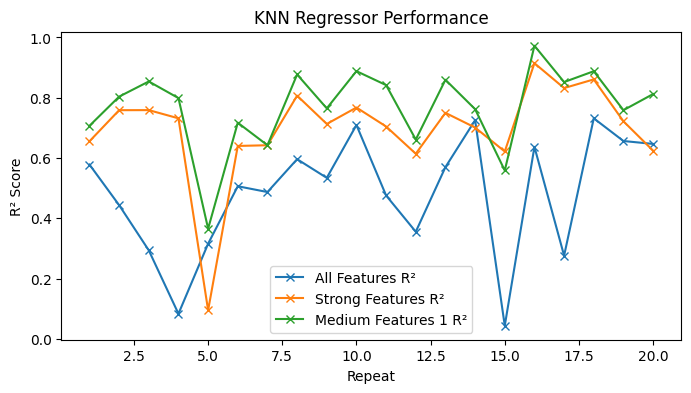

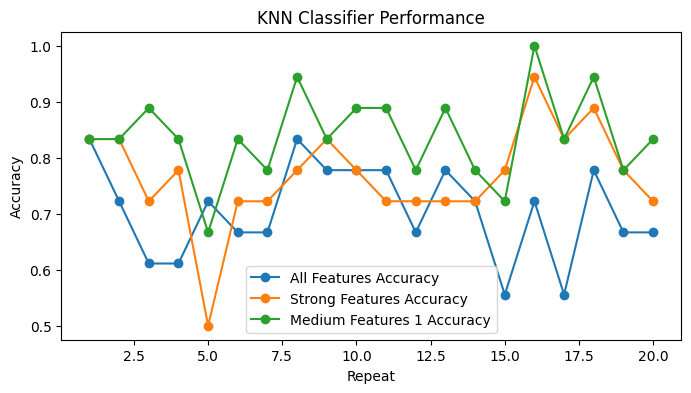

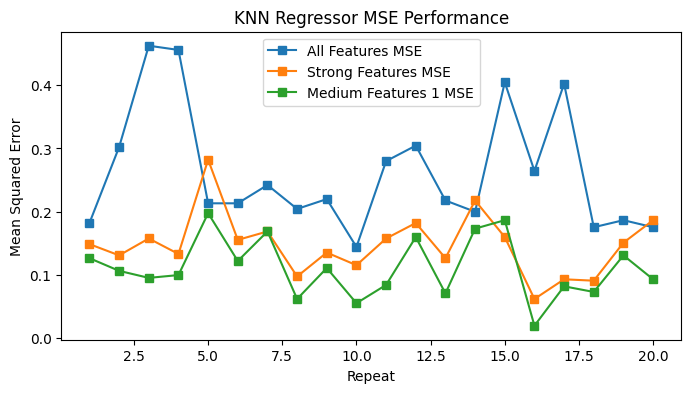

In [52]:

# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data, strong_features, medium_features_1, data_features, test_size=0.1, n_repeats=20)


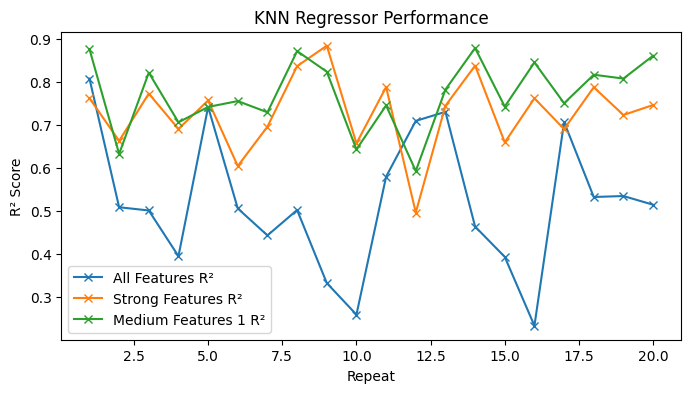

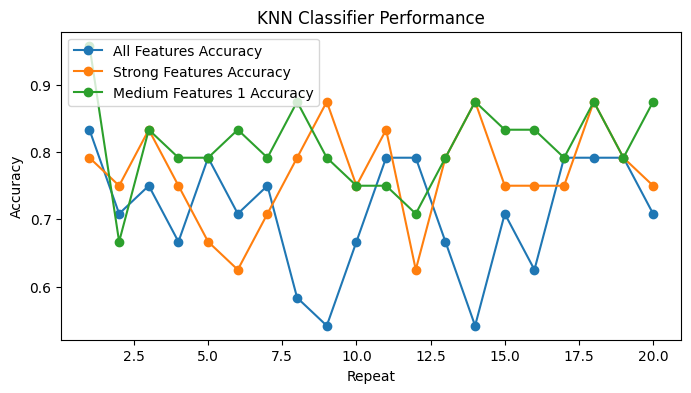

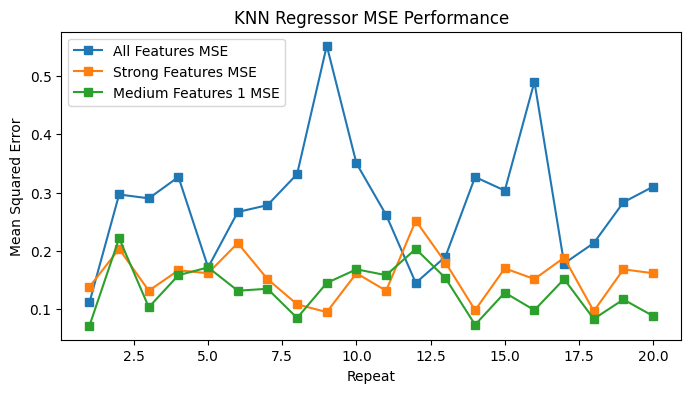

In [53]:
# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data, strong_features, medium_features_1, data_features, test_size=0.13, n_repeats=20)


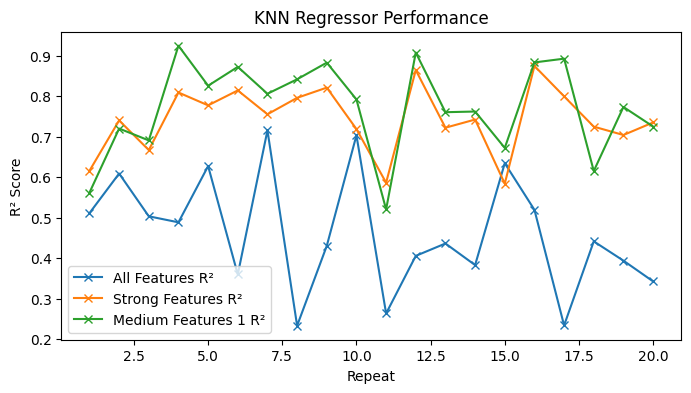

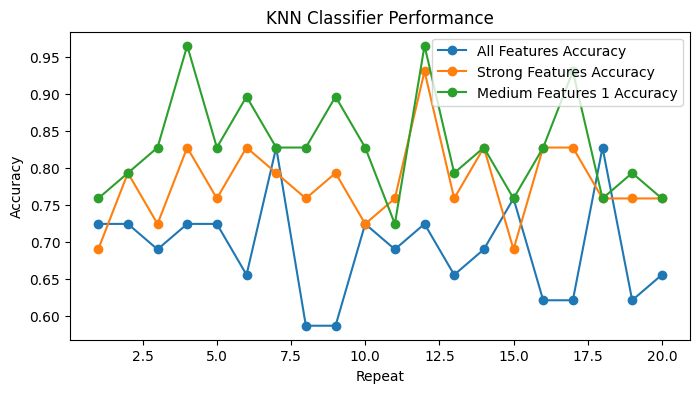

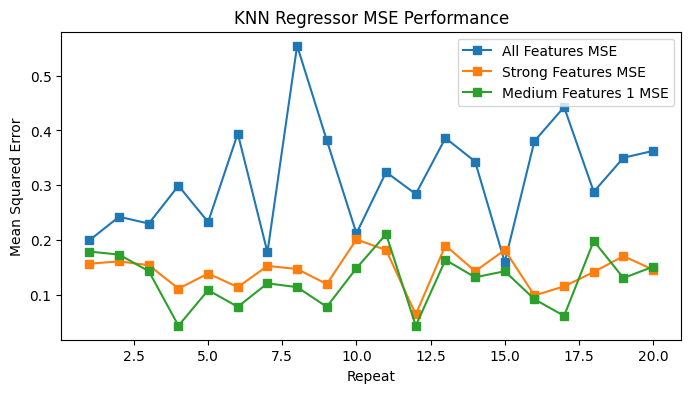

In [54]:
# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data, strong_features, medium_features_1,  data_features, test_size=0.16, n_repeats=20)


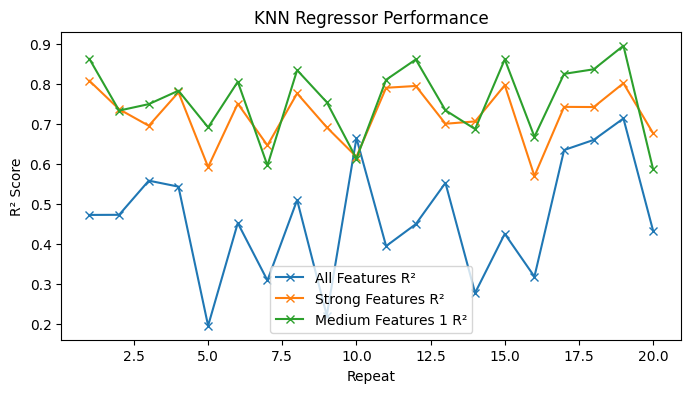

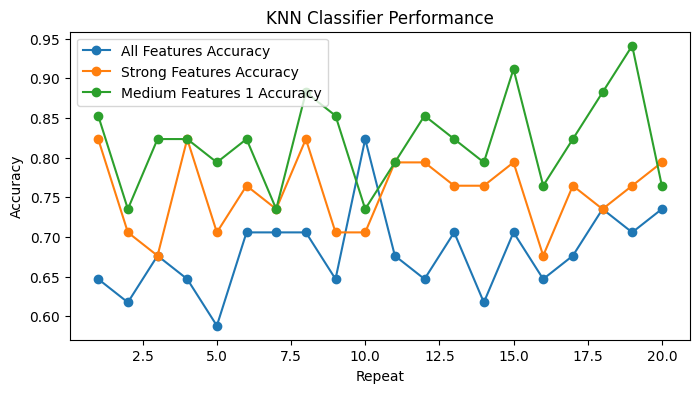

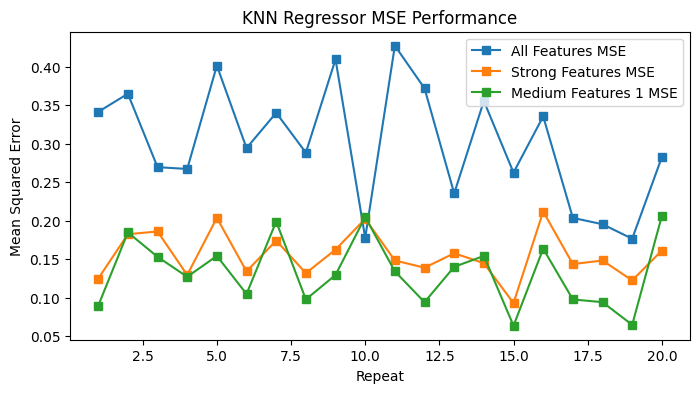

In [55]:
# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data, strong_features, medium_features_1, data_features, test_size=0.19, n_repeats=20)


🔎 Feature Group Performance Summary (Cancer dataset):
                         Feature  R2_Score       MSE
6                     flavanoids  0.825057  0.104494
11  od280/od315_of_diluted_wines  0.733635  0.159101
10                           hue  0.638075  0.216180
5                  total_phenols  0.634689  0.218202
12                       proline  0.613620  0.230787
8                proanthocyanins  0.529346  0.281124
1                     malic_acid  0.509783  0.292809
9                color_intensity  0.397292  0.360000
3              alcalinity_of_ash  0.392402  0.362921
0                        alcohol  0.314524  0.409438
7           nonflavanoid_phenols  0.253576  0.445843
2                            ash  0.182846  0.488090
4                      magnesium  0.163282  0.499775

📊 Grouped Feature Performance Summary (R² and Accuracy and MSE):
                 Feature_Group  R2_Score  Accuracy       MSE
0                 All Features  0.674568  0.786517  0.194382
1              S

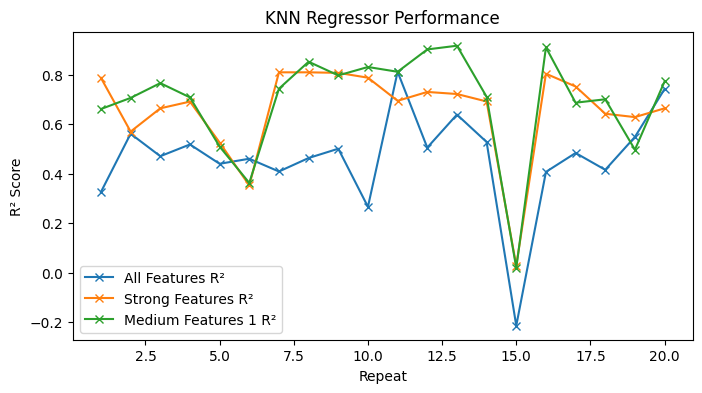

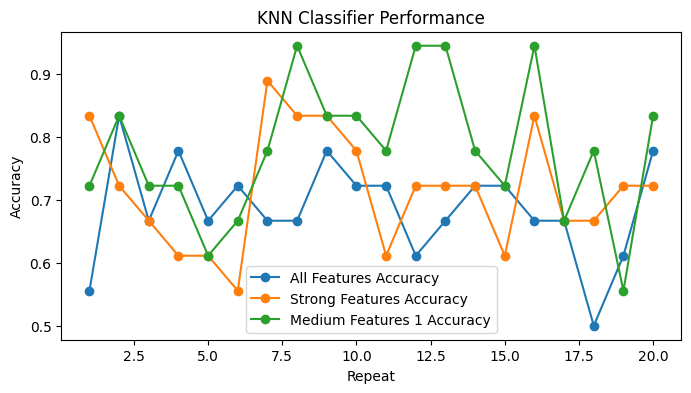

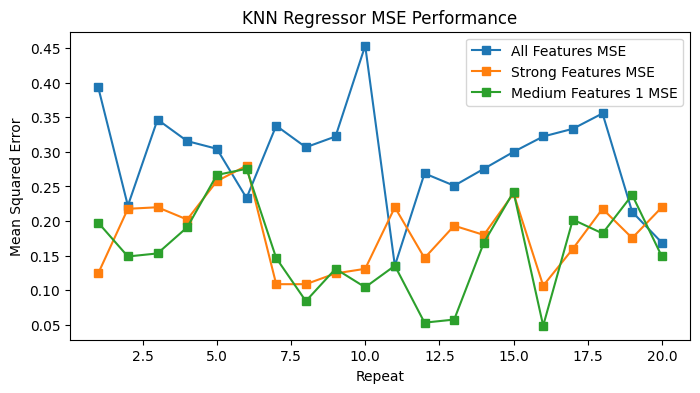

In [57]:
#[1]
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.datasets import load_wine
from sklearn.metrics import r2_score, accuracy_score ,mean_squared_error
from sklearn.model_selection import train_test_split

# Function to prioritize features based on KNN R² score
def features_prioritization(X, y, features):
    features_scores = []
    knn_reg = KNeighborsRegressor()

    for feature in features:
        X_feature = X[[feature]]  # Ensure 2D
        knn_reg.fit(X_feature, y)
        y_pred = knn_reg.predict(X_feature)
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        features_scores.append((feature, r2, mse))  # اضافه شد

    df_scores = pd.DataFrame(features_scores, columns=['Feature', 'R2_Score', 'MSE']).sort_values(by='R2_Score', ascending=False)
    return df_scores

# Function to prioritize features based on KNN MSE

def knn_mse(X_data, y_data, selected_features):
    if len(selected_features) == 0:
        return np.nan
    model = KNeighborsRegressor()
    X_subset = X_data[selected_features]
    model.fit(X_subset, y_data)
    y_pred = model.predict(X_subset)
    return mean_squared_error(y_data, y_pred)


#[3]
# Function to compute KNN classification accuracy for feature group
def knn_accuracy(X, y, selected_features):
    if not selected_features:
        return np.nan
    model = KNeighborsClassifier()
    X_subset = X[selected_features]
    model.fit(X_subset, y)
    y_pred = model.predict(X_subset)
    return accuracy_score(y, y_pred)



#[4]
# مثال برای بارگذاری دیتاست wine
data = load_wine()
X_data = pd.DataFrame(data.data, columns=data.feature_names)
y_data= data.target
data_features = data.feature_names


#[5]
# Run feature prioritization for the iris dataset
data_scores = features_prioritization(X_data, y_data, data_features)
print("🔎 Feature Group Performance Summary (Cancer dataset):")
print(data_scores)  # Categorize features by R² score


# Categorizing features by R² score into multiple levels
strong_features = data_scores[data_scores['R2_Score'] > 0.8]['Feature'].tolist()
medium_features_1 = data_scores[(data_scores['R2_Score'] > 0.7) ]['Feature'].tolist()
medium_features_2 = data_scores[(data_scores['R2_Score'] > 0.6) ]['Feature'].tolist()
medium_features_3 = data_scores[(data_scores['R2_Score'] > 0.5) ]['Feature'].tolist()
medium_features_4 = data_scores[(data_scores['R2_Score'] > 0.4) ]['Feature'].tolist()
medium_features_5 = data_scores[(data_scores['R2_Score'] > 0.3) ]['Feature'].tolist()
medium_features_6 = data_scores[(data_scores['R2_Score'] > 0.2) ]['Feature'].tolist()



#[7]
# Function to safely compute KNN R² score for feature group

def knn_score(X_data, y_data, selected_features):
    if len(selected_features) == 0:  # اصلاح این خط
        return np.nan
    model = KNeighborsRegressor()
    X_subset = X_data[selected_features]
    model.fit(X_subset, y_data)
    return model.score(X_subset, y_data)



# Compute R² and accuracy scores for each group
groups = [data_features, strong_features, medium_features_1, medium_features_2, medium_features_3,
          medium_features_4, medium_features_5, medium_features_6]

r2_scores = [knn_score(X_data, y_data, group) for group in groups]
acc_scores = [knn_accuracy(X_data, y_data, group) for group in groups]
mse_scores = [knn_mse(X_data, y_data, group) for group in groups]

[9]
# Build summary DataFrame
summary_df = pd.DataFrame({
    'Feature_Group': ['All Features', 'Strong Features', 'Medium Features_1 (0.7-0.8)', 'Medium Features_2 (0.6-0.7)',
                      'Medium Features_3 (0.5-0.6)', 'Medium Features_4 (0.4-0.5)', 'Medium Features_5 (0.3-0.4)',
                      'Medium Features_6 (0.2-0.3)'],
    'R2_Score': r2_scores,
    'Accuracy': acc_scores,
    'MSE': mse_scores
})

print("\n📊 Grouped Feature Performance Summary (R² and Accuracy and MSE):")
print(summary_df)





def knn_evaluation(X_data, y_data, strong_features,medium_features_1,  data_features, test_size, n_repeats):
    # Initialize lists to store the results


    mse_scores = {
    "all_features": [],
    "strong_features": [],
    "medium_features_1": []
    }



    r2_scores = {
        "all_features": [],
        "strong_features": [],
        "medium_features_1": []
    }
    accuracy_scores = {
        "all_features": [],
        "strong_features": [],
        "medium_features_1": []
    }

    # List of feature groups to evaluate
    feature_groups = {
        "all_features": data_features,
        "strong_features": strong_features,
        "medium_features_1": medium_features_1
    }

    # Repeat the process n_repeats times with different train-test splits
    for _ in range(n_repeats):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

        for group_name, group_features in feature_groups.items():
            # KNN Regressor
            knn_reg = KNeighborsRegressor(n_neighbors=5)
            knn_reg.fit(X_train[group_features], y_train)
            y_pred_reg = knn_reg.predict(X_test[group_features])
            r2_scores[group_name].append(r2_score(y_test, y_pred_reg))
            mse_scores[group_name].append(mean_squared_error(y_test, y_pred_reg))



            # KNN Classifier
            knn_cls = KNeighborsClassifier(n_neighbors=5)
            knn_cls.fit(X_train[group_features], y_train)
            y_pred_cls = knn_cls.predict(X_test[group_features])
            accuracy_scores[group_name].append(accuracy_score(y_test, y_pred_cls))

    # Plot results for R² and Accuracy
    x = np.arange(1, n_repeats + 1)


    # R² plot
    plt.figure( figsize=(8, 4))
    for group_name, r2_list in r2_scores.items():
        plt.plot(x, r2_list, label=f"{group_name.replace('_', ' ').title()} R²", marker='x')
    plt.xlabel('Repeat')
    plt.ylabel('R² Score')
    plt.title('KNN Regressor Performance')
    plt.legend()
    plt.show()

    # Accuracy plot
    plt.figure( figsize=(8, 4))
    for group_name, accuracy_list in accuracy_scores.items():
        plt.plot(x, accuracy_list, label=f"{group_name.replace('_', ' ').title()} Accuracy", marker='o')
    plt.xlabel('Repeat')
    plt.ylabel('Accuracy')
    plt.title('KNN Classifier Performance')
    plt.legend()
    plt.show()


     # MSE plot
    plt.figure(figsize=(8, 4))
    for group_name, mse_list in mse_scores.items():
        plt.plot(x, mse_list, label=f"{group_name.replace('_', ' ').title()} MSE", marker='s')
    plt.xlabel('Repeat')
    plt.ylabel('Mean Squared Error')
    plt.title('KNN Regressor MSE Performance')
    plt.legend()
    plt.show()


# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data, strong_features, medium_features_1,  data_features, test_size=0.10, n_repeats=20)


In [60]:
def knn_evaluation_table(X_data, y_data, strong_features, medium_features_1, data_features, test_sizes, n_repeats):
    results = []

    feature_groups = {
        "All": data_features,
        "Medium": medium_features_1
    }

    for test_size in test_sizes:
        for i in range(1, n_repeats + 1):
            X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

            # محاسبه برای همه ویژگی‌ها
            knn_reg_all = KNeighborsRegressor(n_neighbors=5)
            knn_reg_all.fit(X_train[feature_groups["All"]], y_train)
            y_pred_all = knn_reg_all.predict(X_test[feature_groups["All"]])
            mse_all = mean_squared_error(y_test, y_pred_all)
            r2_all = r2_score(y_test, y_pred_all)

            # محاسبه برای ویژگی‌های متوسط
            knn_reg_modified = KNeighborsRegressor(n_neighbors=5)
            knn_reg_modified.fit(X_train[feature_groups["Medium"]], y_train)
            y_pred_modified = knn_reg_modified.predict(X_test[feature_groups["Medium"]])
            mse_modified = mean_squared_error(y_test, y_pred_modified)
            r2_modified = r2_score(y_test, y_pred_modified)

            # ذخیره در لیست
            results.append({
                "Percentage": f"{int(test_size * 100)}%",
                "Repetition": f"n={i}",
                "MSE_All": mse_all,
                "R2_All": r2_all,
                "MSE_Modified": mse_modified,
                "R2_Modified": r2_modified
            })

    # ساخت دیتافریم خروجی
    df_result = pd.DataFrame(results)
    return df_result


In [61]:
# درصدهای تست مختلف
test_sizes = [0.10, 0.13, 0.16, 0.19, 0.25]
n_repeats = 20

# اجرای ارزیابی و دریافت جدول
final_df = knn_evaluation_table(X_data, y_data, strong_features, medium_features_1, data_features, test_sizes, n_repeats)

# نمایش جدول
print(final_df)

# (اختیاری) ذخیره جدول در فایل اکسل یا CSV
# final_df.to_csv("knn_results_table.csv", index=False)


   Percentage Repetition   MSE_All    R2_All  MSE_Modified  R2_Modified
0         10%        n=1  0.206667  0.535000      0.148889     0.665000
1         10%        n=2  0.291111  0.595193      0.151111     0.789871
2         10%        n=3  0.384444  0.505714      0.117778     0.848571
3         10%        n=4  0.195556  0.744516      0.160000     0.790968
4         10%        n=5  0.531111  0.261459      0.097778     0.864034
..        ...        ...       ...       ...           ...          ...
95        25%       n=16  0.226667  0.591637      0.135111     0.756584
96        25%       n=17  0.321778  0.497222      0.129778     0.797222
97        25%       n=18  0.368889  0.384679      0.094222     0.842834
98        25%       n=19  0.389333  0.244828      0.126222     0.755172
99        25%       n=20  0.334222  0.471250      0.118222     0.812969

[100 rows x 6 columns]
